# Homework 2 - IEEE Fraud Detection

**Part 1 - Fraudulent vs Non-Fraudulent Transaction** 

---





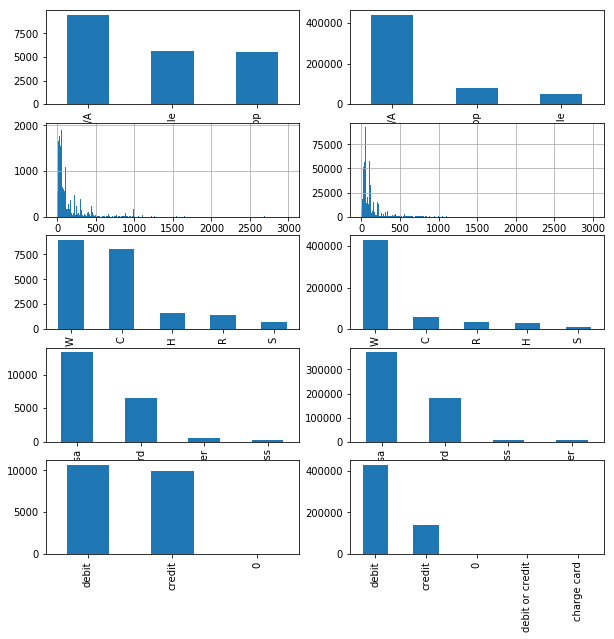

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
import matplotlib.pyplot as plt
csv_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv',index_col='TransactionID') #Loading content from google drive
csv_data = csv_data.loc[:,'isFraud':'dist2']
id_data = pd.read_csv('/content/drive/My Drive/train_identity.csv',index_col='TransactionID')
id_data = id_data.loc[:,['id_30','id_31','DeviceType','DeviceInfo']]

csv_data = csv_data.join(id_data)  #https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index
csv_data['TransactionDT'] = csv_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
csv_data['hour'] = csv_data['TransactionDT'].dt.hour+csv_data['TransactionDT'].dt.minute/60

cleanup = ['card1','card2','card3','card5','card6','dist1','dist2','addr1','addr2']
for col in cleanup :
  csv_data[col] = csv_data[col].fillna(0)
cleanup_2 = ['id_30','id_31','DeviceType','DeviceInfo']
for col in cleanup_2 :
  csv_data[col] = csv_data[col].fillna('N/A')
  
  
fig, axes = plt.subplots(5, 2) 
fraud = csv_data[csv_data['isFraud'] == 1]
notfraud = csv_data[csv_data['isFraud'] == 0]

fraud_counts = fraud['DeviceType'].value_counts()
notfraud_counts = notfraud['DeviceType'].value_counts()


fraud_counts.plot.bar(ax=axes[0][0],figsize=(50,50))
notfraud_counts.plot.bar(ax=axes[0][1],figsize=(50,50))

fraudamt = fraud.loc[:,'TransactionAmt']
notfraudamt = notfraud.loc[:,'TransactionAmt']
fraudamt.hist( bins=np.arange(0,3000,10), ax=axes[1][0],figsize=(10,10))
notfraudamt.hist( bins=np.arange(0,3000,10), ax=axes[1][1],figsize=(10,10))

fraud_codes = fraud['ProductCD'].value_counts()
notfraud_codes = notfraud['ProductCD'].value_counts()
fraud_codes.plot.bar(ax=axes[2][0],figsize=(10,10))
notfraud_codes.plot.bar(ax=axes[2][1],figsize=(10,10))


fraud_cards = fraud['card4'].value_counts()
notfraud_cards = notfraud['card4'].value_counts()
fraud_cards.plot.bar(ax=axes[3][0],figsize=(10,10))
notfraud_cards.plot.bar(ax=axes[3][1],figsize=(10,10))


fraud_cd = fraud['card6'].value_counts()
notfraud_cd = notfraud['card6'].value_counts()
fraud_cd.plot.bar(ax=axes[4][0],figsize=(10,10))
notfraud_cd.plot.bar(ax=axes[4][1],figsize=(10,10))











*Conclusion*: In the above comparison of results of fraudulent vs non-fraudulent we can see the following (Fraudulent dataset is in the left column )

1.   Non-Fraudulent transactions were limited to an amount of 1000-1200 . Fraudulent transactions on the other hand showed a spike at 1000 ,with transactions crossing into  1500 . This suggests that Fraudulent transactions were mainly high value purchases with amounts ranging between 1000-1500 . While Non-Fraudulent transactions did have purchases in that range, the Fraudulent transactions showed a higher probability in that range.

2.   The productcode W andC seem to be targeted a lot in Fraudulent transactions. While in Non-Fraudulent transactions the productcd is purchased, there is a higher likelyhood of a Fraudulent transaction if its in the ProductCode W or C.





**Part 2 - Transaction Frequency**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31750069b0>]],
      dtype=object)

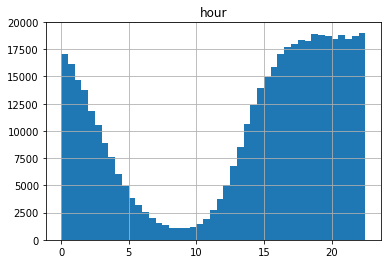

In [0]:
from google.colab import drive
import logging
from datetime import datetime
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
csv_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv') #Loading content from google drive


logging.info("Calculate the date from timestamp.")
csv_data['date'] = csv_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
csv_data['hour'] = csv_data['date'].dt.hour+csv_data['date'].dt.minute/60
csv_data['min'] = csv_data['date'].dt.minute
csv_data['secs'] = csv_data['date'].dt.second

csv_data = csv_data.loc[:,["addr2","TransactionDT","hour","min","secs"]]
mode = csv_data.mode()
csv_data = csv_data[csv_data['addr2'] == int(mode['addr2'])]
freq = csv_data['hour'].value_counts()


#From the plot the sleeping hours are between 5-11
csv_data = csv_data.loc[:,["hour"]]
csv_data.hist(bins=np.arange(0,23,0.5))








Conclusion: The most frequent country is the country with the code 87. The waking hours associated with this country (not accounting the timezone) is between 15:00 and 4:00. While this inaccurate, we may need further information on the timezone to better deliver the results.

**Part 3 - Product Code**

<Figure size 432x288 with 0 Axes>

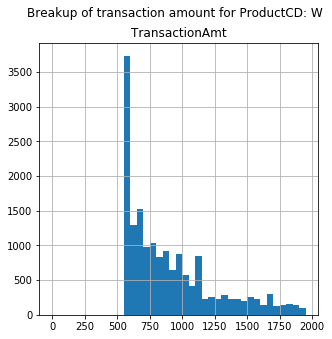

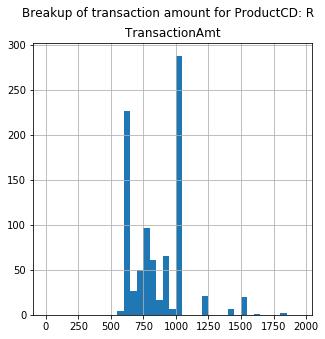

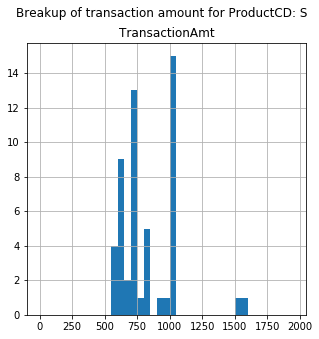

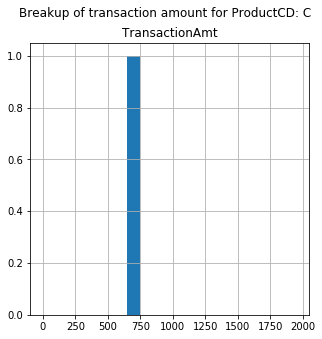

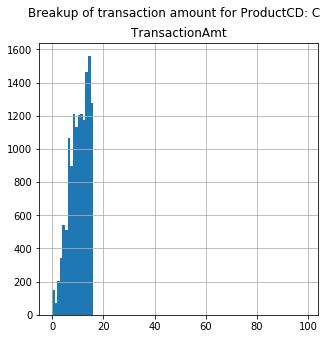

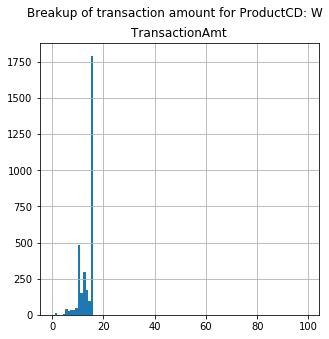

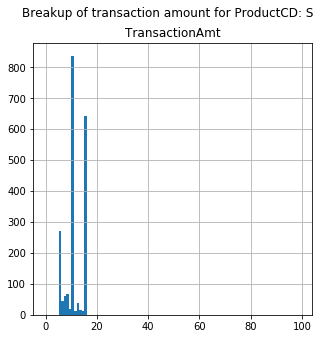

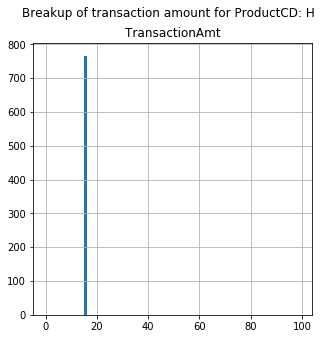

In [0]:

from google.colab import drive
import matplotlib.pyplot as plt
#drive.mount('/content/drive')

#!ls '/content/drive/My Drive'

import pandas as pd

csv_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv')
total_rows = csv_data.shape[0]
lim_txs = csv_data.loc[:,['TransactionAmt','ProductCD']]
unique_codes= lim_txs['ProductCD'].unique()
max_v = lim_txs.nlargest(20000,'TransactionAmt')
min_v = lim_txs.nsmallest(20000,'TransactionAmt')
max_unique_codes = max_v['ProductCD'].unique()
min_unique_codes = min_v['ProductCD'].unique()

#fig,axes = plt.subplots(4,2)

#The following are plots for each of ProductCD of maximum values
i = 0
j = 0
plt.tight_layout()
for item in max_unique_codes :
  temp = max_v[max_v['ProductCD'] == item]
  temp.hist(bins=np.arange(0,2000,50),figsize=(5,5))
  i += 1
  plt.suptitle("Breakup of transaction amount for ProductCD: "+item)
  
i=0 
j=1
#The following are plots for each of ProductCD of minimum values
for item in min_unique_codes :
  temp = min_v[min_v['ProductCD'] == item]
  temp.hist(bins=np.arange(0,100,1),figsize=(5,5))
  i+=1
  plt.suptitle("Breakup of transaction amount for ProductCD: "+item)


Conclusion: After sorting the dataframe according to the 20,000 most expensive and 20,000 least expensive products and then plotting the same data per product code on the histogram (For expensive/cheap products) the following is evident


1.   Product code W,R and S have the most expensive products, the top two histograms confirms this with the prodcuts being present with a minimum price of 500 and a maximum of 1750 dollars.
2.   Product code C,H and S are the cheapest product with a price range from a few cents to 20 dollars. While product W has also shown to have some cheap products. 



**Part 4 - Correlation Coefficient** 

In [0]:
from google.colab import drive
import logging
from datetime import datetime
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
csv_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv') #Loading content from google drive


logging.info("Calculate the date from timestamp.")
csv_data['date'] = csv_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
#print(csv_data.shape)
csv_data['timeofday'] = csv_data['date'].dt.hour.astype(int)
csv_data = csv_data.loc[:,['timeofday','TransactionAmt']]
#csv_data = csv_data.groupby('timeofday').sum()
#print(csv_data.shape)
#csv_data.corr()
csv_data = csv_data.groupby('timeofday').sum().reset_index()
csv_data.corr()






,timeofday,TransactionAmt
timeofday,1.000000,0.642117
TransactionAmt,0.642117,1.000000


Conclusion: The corelation coefficient is around 0.642 . If we account for a 24 hour format it means that there is lukewarm corelation between the time of the day and the purchase amount. If it was 23:00 local time, its not required that the purchase would be expensive and vice versa.

**Part 5 - Interesting Plot** (In Progress)

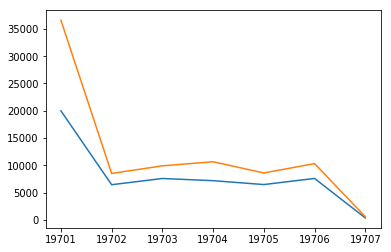

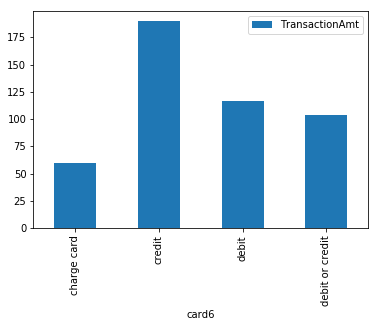

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
import pylab as pl
#drive.mount('/content/drive')
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
import numpy as np
import sys
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
import matplotlib.pyplot as plt
csv_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv',index_col='TransactionID') #Loading content from google drive
csv_data = csv_data.loc[:,'isFraud':'dist2']
id_data = pd.read_csv('/content/drive/My Drive/train_identity.csv',index_col='TransactionID')
id_data = id_data.loc[:,['id_30','id_31','DeviceType','DeviceInfo']]

csv_data = csv_data.join(id_data)  #https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index
csv_data['date'] = csv_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
csv_data['monthyear'] = csv_data['date'].apply(lambda x: str(x.year) + str(x.month))
mb_data = csv_data.loc[:,['monthyear','DeviceType']]

devicetype = mb_data['DeviceType'].unique()
mb_data = mb_data.loc[:,['monthyear','DeviceType']].copy()
mobile_data = mb_data[mb_data['DeviceType'] == 'mobile']
desktop_data = csv_data[mb_data['DeviceType'] == 'desktop']

#print(csv_data.head())

mobile_data = mobile_data['monthyear'].value_counts().sort_index()
desktop_data = desktop_data['monthyear'].value_counts().sort_index()


plt.plot([x for x,y in mobile_data.iteritems()],[y1 for x1,y1 in mobile_data.iteritems()])
plt.plot([x for x,y in desktop_data.iteritems()],[y1 for x1,y1 in desktop_data.iteritems()])
plt.show()   

cc_data = csv_data.loc[:,['TransactionAmt','card6']]
cc_data = cc_data.dropna()
cc_data = cc_data.groupby('card6').mean()

cc_data.plot.bar()






Conclusion: The first plot is about the number of users over months for mobile and desktop platforms, while it shows a drop in the number of users over time, this could be because the training data is not normally distributed.

The second plot shown the mean purchase amount based on the card type, over here credit cards had the highest mean purchase amount, signifying that most users made high expense purchses through credit cards possibly because it made it easier to pay later.

**Part 6 - Prediction Model**

In [0]:
#from google.colab import drive
#import logging
from datetime import datetime
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
import sys
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame


import matplotlib.pyplot as plt
train_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv',index_col='TransactionID') #Loading content from google drive
id_data = pd.read_csv('/content/drive/My Drive/train_identity.csv',index_col='TransactionID')
id_data = id_data.loc[:,['DeviceType']]
id_data['DeviceType'] = id_data['DeviceType'].fillna(0)
id_data['DeviceType'] = id_data['DeviceType'].apply(lambda x : 1 if x == 'mobile' else 2 ) 
train_data = train_data.join(id_data)  #https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index



#Filter out cards - assign numeric values
train_data['DeviceType'] = train_data['DeviceType'].fillna(0)
train_data = train_data.drop(['dist1','dist2'],axis=1)
train_data = train_data.drop(['M1','M2','M3','M4','M5','M6','M7','M8','M9','P_emaildomain','R_emaildomain'],axis=1)
train_data.loc[train_data['card4'].isnull(),'card4'] = '0'
#train_data['card4'] = train_data['card4'].apply(lambda x: 1 if x.strip() == 'mastercard' else  ( 2 if x.strip() == 'visa' else (3 if x.strip() == 'discover' else (4 if x.strip() == 'american express' else 0) ) ) )
train_data.loc[:,'C1':'V339'] = train_data.loc[:,'C1':'V339'].fillna(0)
train_data.loc[train_data['card6'].isnull(),'card6'] = '0'
#train_data['card6'] = train_data['card6'].apply(lambda x : 0 if x.strip() == 'credit' else ( 2 if x.strip() == 'dedit' else ( 3 if x.strip() == 'charge card' else ( 4 if x.strip() == 'debit or credit' else 6 ) ) ))
train_data.loc[:,'addr1':'addr2'] = train_data.loc[:,'addr1':'addr2'].fillna(0)
train_data['ProductCD'] = train_data['ProductCD'].apply( lambda x : ord(x))
train_data.loc[:,['card1','card2','card3','card5']] = train_data.loc[:,['card1','card2','card3','card5']].fillna(0)
train_data['date'] = train_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
train_data['hour'] = train_data['date'].dt.hour.apply(lambda x : int(x))
train_data = train_data.drop(['TransactionDT','date'],axis=1)
le = preprocessing.LabelEncoder()
train_data['card4'] = le.fit_transform(train_data['card4'])
train_data['card6'] = le.fit_transform(train_data['card6'])

#Modify actual data
test_data =  pd.read_csv('/content/drive/My Drive/test_transaction.csv',index_col='TransactionID') #Loading content from google drive
test_id_data = pd.read_csv('/content/drive/My Drive/test_identity.csv',index_col='TransactionID')
test_id_data = test_id_data.loc[:,['DeviceType']]
test_id_data['DeviceType'] = test_id_data['DeviceType'].fillna(0)
test_id_data['DeviceType'] = test_id_data['DeviceType'].apply(lambda x : 1 if x == 'mobile' else 2 ) 
test_data = test_data.join(test_id_data)  #https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

test_data['DeviceType'] = test_data['DeviceType'].fillna(0)
test_data = test_data.drop(['dist1','dist2'],axis=1)
test_data = test_data.drop(['M1','M2','M3','M4','M5','M6','M7','M8','M9','P_emaildomain','R_emaildomain'],axis=1)
test_data.loc[test_data['card4'].isnull(),'card4'] = '0'
test_data['card4'] = test_data['card4'].apply(lambda x: 1 if x.strip() == 'mastercard' else  ( 2 if x.strip() == 'visa' else (3 if x.strip() == 'discover' else (4 if x.strip() == 'american express' else 0) ) ) )
test_data.loc[:,'C1':'V339'] = test_data.loc[:,'C1':'V339'].fillna(0)
test_data.loc[test_data['card6'].isnull(),'card6'] = '0'
test_data['card6'] = test_data['card6'].apply(lambda x : 0 if x.strip() == 'credit' else ( 2 if x.strip() == 'dedit' else ( 3 if x.strip() == 'charge card' else ( 4 if x.strip() == 'debit or credit' else 6 ) ) ))
test_data.loc[:,'addr1':'addr2'] = test_data.loc[:,'addr1':'addr2'].fillna(0)
test_data['ProductCD'] = test_data['ProductCD'].apply( lambda x : ord(x))
test_data.loc[:,['card1','card2','card3','card5']] = test_data.loc[:,['card1','card2','card3','card5']].fillna(0)
test_data['date'] = test_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
test_data['hour'] = test_data['date'].dt.hour.apply(lambda x : int(x))
test_data = test_data.drop(['TransactionDT','date'],axis=1)
test_data['card4'] = le.fit_transform(test_data['card4'])
test_data['card6'] = le.fit_transform(test_data['card6'])




response_vector = train_data.pop('isFraud')

x_train, x_test, y_train, y_test = train_test_split(train_data, response_vector, test_size=.5)


#Build a Model -LinearRegression

submission_dataframe = pd.read_csv('/content/drive/My Drive/sample_submission.csv',index_col='TransactionID')
#fin_test_df = pd.DataFrame(columns=test_data.columns)
drop_array = []
idx = submission_dataframe.index

for index,row in test_data.iterrows():
    if not idx.contains(index) :
       drop_array.append(index)
test_data = test_data.drop(drop_array)


'''
from sklearn.linear_model import LogisticRegression, LinearRegression
response_vector = train_data.pop('isFraud')
clf = LogisticRegression(solver='lbfgs',max_iter=100000)
clf.fit(train_data, response_vector)
preds = clf.predict(test_data)


#Build a model  - DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(train_data, response_vector) 
preds = dtree_model.predict(test_data) 


#Build a model  - RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
preds = model.predict(x_test)


from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

'''


from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
preds= rr.predict(x_test)



score = (accuracy_score(y_test, preds.round(), normalize=True))


print("Accurace Score: " + str(score))



Accurace Score: 0.9691062417448437


Explanation : 
The first part of the task was cleaning the data. I tried removing various columns that seemed to have no relevant data, a quick view through excel sheet on the some of the columns revealed that they had mostly empty cells (np.nan) and would not have been wise to keep them to build a model.


A coarse way to clean the data was to convert the text values to numeric. For eg. the card4 column has visa,mastercard, etc values which could simply be mapped to numeric values of 0,1,2, etc. This same technique was applied to columns DeviceType, card6 and others yielding a numeric set of values for a column.

The next step was extracting the response vecctor or the expected results from the train_transaction dataset i.e the isFraud column. The train_identity csv was combined with the train_transaction csv as one dataframe with some columns omitted and others reduced to numeric values.

Lastly the train_transacation dataset was split into two segments, one to train and the other to verify the accuracy of the model.


The basic process then to build a model and use the model is as follows


1.   Import a releveant python Machine Learning library
2.   Create an instance of that library (LogisticRegression, DecisionTree, RandomForestRegressor)
3.   Fit the training data into the instance for training the model
4.   Lastly apply the trained model onto the actual dataset

While, I am not aware of how Machine learning models work; my recent exposure to the N.L.P course gave me some insight along with some resources from Google. The following are the links I have used to build a model:
- https://www.geeksforgeeks.org/getting-started-machine-learning/
- https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/
- https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn
- https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd

The last link gave me a quick cheat-sheet on which model I could use.  Based on the cheat-sheet RidgeRegression seemed to be the most appropriate model to use, since it was stated that it works best with a set of continuous numerical values to train the model and we did have those. For eg.numeric values for time of the day/PurchaseAmt provided a continuous set of values.

Accuracy score :-
- Ridge Regression : 0.9688
- SGD Classifier : 0.9660
 









## Part 7 - Final Result

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
import sys
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame


import matplotlib.pyplot as plt
train_data =  pd.read_csv('/content/drive/My Drive/train_transaction.csv',index_col='TransactionID') #Loading content from google drive
id_data = pd.read_csv('/content/drive/My Drive/train_identity.csv',index_col='TransactionID')
id_data = id_data.loc[:,['DeviceType']]
id_data['DeviceType'] = id_data['DeviceType'].fillna(0)
id_data['DeviceType'] = id_data['DeviceType'].apply(lambda x : 1 if x == 'mobile' else 2 ) 
train_data = train_data.join(id_data)  #https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index



#Filter out cards - assign numeric values
train_data['DeviceType'] = train_data['DeviceType'].fillna(0)
train_data = train_data.drop(['dist1','dist2'],axis=1)
train_data = train_data.drop(['M1','M2','M3','M4','M5','M6','M7','M8','M9','P_emaildomain','R_emaildomain'],axis=1)
train_data.loc[train_data['card4'].isnull(),'card4'] = '0'
#train_data['card4'] = train_data['card4'].apply(lambda x: 1 if x.strip() == 'mastercard' else  ( 2 if x.strip() == 'visa' else (3 if x.strip() == 'discover' else (4 if x.strip() == 'american express' else 0) ) ) )
train_data.loc[:,'C1':'V339'] = train_data.loc[:,'C1':'V339'].fillna(0)
train_data.loc[train_data['card6'].isnull(),'card6'] = '0'
#train_data['card6'] = train_data['card6'].apply(lambda x : 0 if x.strip() == 'credit' else ( 2 if x.strip() == 'dedit' else ( 3 if x.strip() == 'charge card' else ( 4 if x.strip() == 'debit or credit' else 6 ) ) ))
train_data.loc[:,'addr1':'addr2'] = train_data.loc[:,'addr1':'addr2'].fillna(0)
train_data['ProductCD'] = train_data['ProductCD'].apply( lambda x : ord(x))
train_data.loc[:,['card1','card2','card3','card5']] = train_data.loc[:,['card1','card2','card3','card5']].fillna(0)
train_data['date'] = train_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
train_data['hour'] = train_data['date'].dt.hour.apply(lambda x : int(x))
train_data = train_data.drop(['TransactionDT','date'],axis=1)
le = preprocessing.LabelEncoder()
train_data['card4'] = le.fit_transform(train_data['card4'])
train_data['card6'] = le.fit_transform(train_data['card6'])

#Modify actual data
test_data =  pd.read_csv('/content/drive/My Drive/test_transaction.csv',index_col='TransactionID') #Loading content from google drive
test_id_data = pd.read_csv('/content/drive/My Drive/test_identity.csv',index_col='TransactionID')
test_id_data = test_id_data.loc[:,['DeviceType']]
test_id_data['DeviceType'] = test_id_data['DeviceType'].fillna(0)
test_id_data['DeviceType'] = test_id_data['DeviceType'].apply(lambda x : 1 if x == 'mobile' else 2 ) 
test_data = test_data.join(test_id_data)  #https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

test_data['DeviceType'] = test_data['DeviceType'].fillna(0)
test_data = test_data.drop(['dist1','dist2'],axis=1)
test_data = test_data.drop(['M1','M2','M3','M4','M5','M6','M7','M8','M9','P_emaildomain','R_emaildomain'],axis=1)
test_data.loc[test_data['card4'].isnull(),'card4'] = '0'
test_data['card4'] = test_data['card4'].apply(lambda x: 1 if x.strip() == 'mastercard' else  ( 2 if x.strip() == 'visa' else (3 if x.strip() == 'discover' else (4 if x.strip() == 'american express' else 0) ) ) )
test_data.loc[:,'C1':'V339'] = test_data.loc[:,'C1':'V339'].fillna(0)
test_data.loc[test_data['card6'].isnull(),'card6'] = '0'
test_data['card6'] = test_data['card6'].apply(lambda x : 0 if x.strip() == 'credit' else ( 2 if x.strip() == 'dedit' else ( 3 if x.strip() == 'charge card' else ( 4 if x.strip() == 'debit or credit' else 6 ) ) ))
test_data.loc[:,'addr1':'addr2'] = test_data.loc[:,'addr1':'addr2'].fillna(0)
test_data['ProductCD'] = test_data['ProductCD'].apply( lambda x : ord(x))
test_data.loc[:,['card1','card2','card3','card5']] = test_data.loc[:,['card1','card2','card3','card5']].fillna(0)
test_data['date'] = test_data['TransactionDT'].apply(lambda x : datetime.fromtimestamp(x))
test_data['hour'] = test_data['date'].dt.hour.apply(lambda x : int(x))
test_data = test_data.drop(['TransactionDT','date'],axis=1)
test_data['card4'] = le.fit_transform(test_data['card4'])
test_data['card6'] = le.fit_transform(test_data['card6'])




response_vector = train_data.pop('isFraud')

#x_train, x_test, y_train, y_test = train_test_split(train_data, response_vector, test_size=.5)


#Build a Model -LinearRegression

submission_dataframe = pd.read_csv('/content/drive/My Drive/sample_submission.csv',index_col='TransactionID')
#fin_test_df = pd.DataFrame(columns=test_data.columns)
drop_array = []
idx = submission_dataframe.index

for index,row in test_data.iterrows():
    if not idx.contains(index) :
       drop_array.append(index)
test_data = test_data.drop(drop_array)


'''
from sklearn.linear_model import LogisticRegression, LinearRegression
response_vector = train_data.pop('isFraud')
clf = LogisticRegression(solver='lbfgs',max_iter=100000)
clf.fit(train_data, response_vector)
preds = clf.predict(test_data)


#Build a model  - DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(train_data, response_vector) 
preds = dtree_model.predict(test_data) 


#Build a model  - RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
preds = model.predict(x_test)


from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

'''


from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(train_data, response_vector) 
preds= rr.predict(test_data)

prediction = pd.DataFrame({
    "TransactionID" : list(test_data.index),
    "isFraud" : list(preds)
})

f = open('/content/drive/My Drive/response.csv','w')
prediction.to_csv(r'/content/drive/My Drive/response.csv',index=False)




My Score for each model:
1. LinearRegression - 0.52
2. DecisionTreeClassifier - .7141 
3. RandomForestRegressor - 0.7114
4. SGDClassifier - 0.5993
5. RidgeRegression 

 - Score : .8531








Kaggle Link: https://www.kaggle.com/virajkcs

Highest Rank: 5104

Score: .8531

Number of entries: 7

IMAGE OF KAGGLE RANKING :  drive.google.com/open?id=18CSAPzaunEFgnEs3sTcE_5pL9Q_WHhkj